In [7]:
# Lista de librerías a instalar
libraries = ['pandas', 'matplotlib', 'seaborn', 'tensorflow','seaborn','tqdm','librosa', 'sounddevice' ,'numpy' ,'scipy','sounddevice']

# Instalar solo si no están ya instaladas
for lib in libraries:
    try:
        __import__(lib)
        print(f"{lib} ya está instalada")
    except ImportError:
        %pip install {lib} 
        print(f"Instalando {lib}...")

pandas ya está instalada
matplotlib ya está instalada
seaborn ya está instalada
tensorflow ya está instalada
seaborn ya está instalada
tqdm ya está instalada
librosa ya está instalada
sounddevice ya está instalada
numpy ya está instalada
scipy ya está instalada
sounddevice ya está instalada


In [8]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Sistema y utilidades
import os
import sys
from IPython.display import Audio

# Procesamiento de audio
import librosa
import librosa.display

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

# Manejo de advertencias
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore')

# Configuración inicial corregida
plt.style.use('seaborn-v0_8')  # Estilo actualizado compatible con Matplotlib
sns.set_palette('husl')        # Paleta de colores agradable

# Audio y deep learning
import sounddevice as sd
import tensorflow as tf

# Modelado con TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Concurrencia
import concurrent.futures


In [9]:
##variables
emociones = []
Tess    =   os.path.join(os.getcwd(), 'datasets', 'TESS', 'TESS_Toronto_emotional_speech_set_data','TESS_Toronto_emotional_speech_set_data')
Ravdess =   os.path.join(os.getcwd(), 'datasets', 'Ravdess', 'audio_speech_actors_01-24/')
Savee   =   os.path.join(os.getcwd(), 'datasets', 'Savee', 'ALL')

TESS (Toronto Emotional Speech Set)
📌 Lo mejor:
✅ Contiene grabaciones de voces femeninas (dos actrices).
✅ Cubre seis emociones: felicidad, tristeza, ira, sorpresa, miedo y disgusto.
✅ Alta calidad de audio (16 kHz, formato WAV).
✅ Fácil de procesar por su estructura organizada.

🛑 Limitación: Solo voces femeninas, lo que puede sesgar modelos.

2️⃣ RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song)
📌 Lo mejor:
✅ Incluye voces masculinas y femeninas (24 actores).
✅ Contiene tanto habla como canto, lo que amplía las aplicaciones.
✅ 8 emociones bien diferenciadas: calma, felicidad, tristeza, enojo, miedo, sorpresa, disgusto y neutralidad.
✅ Calidad de audio profesional (48 kHz, WAV).

🛑 Limitación: Puede ser más pesado y complejo de procesar.

3️⃣ SAVEE (Surrey Audio-Visual Expressed Emotion)
📌 Lo mejor:
✅ Grabaciones de cuatro hablantes masculinos.
✅ Contiene 7 emociones (neutra, feliz, triste, enojado, sorprendido, asustado y disgustado).
✅ Buena calidad de audio (44.1 kHz).

🛑 Limitación: Solo voces masculinas, lo que reduce la diversidad.

In [10]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    dir_path = os.path.join(Tess, dir)
    
    # Verificamos que sea un directorio antes de listar su contenido
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            part = file.rsplit('.', 1)[0].split('_')  # Separa antes de la extensión y luego por '_'
            
            if len(part) > 2:  # Evita errores en archivos con nombres inesperados
                emotion = "surprise" if part[2] == "ps" else part[2]
                file_emotion.append(emotion)
                file_path.append(os.path.join(dir_path, file))

# Creando DataFrame combinando emociones y rutas
Tess_df = pd.DataFrame({"Emotions": file_emotion, "Path": file_path})

# Mostrando los primeros registros
Tess_df.head()


,Emotions,Path
0,angry,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
1,angry,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
2,angry,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
3,angry,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
4,angry,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...


##DATASETS DE RAVDEES


In [11]:
# Obtener lista de directorios en Ravdess
ravdess_directory_list = os.listdir(Ravdess)

# Inicializar listas vacías para emociones y rutas de archivos
file_emotion = []
file_path = []

# Iterar a través de cada directorio en Ravdess
for dir in ravdess_directory_list:
    dir_path = os.path.join(Ravdess, dir)
    
    # Verificar que sea un directorio antes de procesarlo
    if os.path.isdir(dir_path):
        # Obtener lista de archivos de audio para cada actor
        for file in os.listdir(dir_path):
            # Dividir el nombre del archivo para extraer componentes
            part = file.rsplit('.', 1)[0].split('-')
            
            # Extraer la emoción (la tercera parte representa la emoción) y agregar a las listas
            if len(part) > 2:  # Verificación para evitar errores
                file_emotion.append(int(part[2]))
                file_path.append(os.path.join(dir_path, file))

# Crear DataFrame combinando emociones y rutas
Ravdess_df = pd.DataFrame({"Emotions": file_emotion, "Path": file_path})

# Mapear números de emociones a sus etiquetas correspondientes
emotion_mapping = {
    1: 'neutral',
    2: 'calmado',
    3: 'feliz',
    4: 'triste',
    5: 'enojado',
    6: 'miedo',
    7: 'disgusto',
    8: 'sorpresa'
}
Ravdess_df["Emotions"].replace(emotion_mapping, inplace=True)

# Mostrar las primeras filas del dataframe resultante
Ravdess_df.head()


,Emotions,Path
0,neutral,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
1,neutral,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
2,neutral,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
3,neutral,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
4,calmado,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...


# **Identificadores de nombre de archivo:**

1. **Modalidad**: (01 = AV completo, 02 = solo video, 03 = solo audio).
   - Este identificador especifica el tipo de contenido en el archivo.
   - "AV completo" significa que el archivo incluye tanto video como audio, "solo video" solo tiene video, y "solo audio" solo tiene la pista de audio.

2. **Canal vocal**: (01 = habla, 02 = canción).
   - Este identificador indica si el canal vocal es de una persona hablando o cantando.

3. **Emoción**: (01 = neutro, 02 = tranquilo, 03 = feliz, 04 = triste, 05 = enojado, 06 = temeroso, 07 = disgusto, 08 = sorprendido).
   - Este identificador se refiere a la emoción expresada en el archivo.
   - Cada número representa una emoción específica, como neutro, tranquilo, feliz, etc.

4. **Intensidad emocional**: (01 = normal, 02 = fuerte).
   - Indica la intensidad de la emoción expresada.
   - La emoción "neutra" no tiene intensidad fuerte, solo tiene intensidad normal.

5. **Enunciado**: (01 = "Los niños están hablando junto a la puerta", 02 = "Los perros están sentados junto a la puerta").
   - Este identificador se refiere al enunciado específico que se está pronunciando en el archivo de audio o video.

6. **Repetición**: (01 = 1ª repetición, 02 = 2ª repetición).
   - Este identificador indica la repetición del enunciado. Si el enunciado se repite más de una vez, se marca con el número correspondiente.

7. **Actor**: (01 al 24. Los actores impares son hombres, los actores pares son mujeres).
   - Este identificador asigna un número a cada actor.
   - Los actores impares son hombres y los actores pares son mujeres, con números del 01 al 24.

In [12]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(os.path.join(Savee, file))  # Usa os.path.join para compatibilidad
    
    # Verificamos que el archivo tenga el formato correcto antes de intentar dividir
    part = file.split('_')
    if len(part) > 1:
        ele = part[1][:-6]  # Extrae el código de emoción
        
        emotions_dict = {
            "a": "angry",
            "d": "disgust",
            "f": "fear",
            "h": "happy",
            "n": "neutral",
            "sa": "sad"
        }
        
        # Obtiene la emoción del diccionario, o usa "unknown" como valor por defecto
        file_emotion.append(emotions_dict.get(ele, "unknown"))
    else:
        file_emotion.append("unknown")  # Maneja casos donde no haya '_'

# Creando DataFrame combinando emociones y rutas
Savee_df = pd.DataFrame({"Emotions": file_emotion, "Path": file_path})

# Mostrando los primeros registros
Savee_df.head()


,Emotions,Path
0,angry,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
1,angry,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
2,angry,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
3,angry,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
4,angry,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...


In [13]:
# Concatenar los DataFrames de los tres datasets
data_path = pd.concat([Ravdess_df, Tess_df, Savee_df], ignore_index=True)

# Guardar en un archivo CSV sin índice
data_path.to_csv("data_path.csv", index=False)

# Mostrar los primeros registros
data_path.head()


,Emotions,Path
0,neutral,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
1,neutral,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
2,neutral,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
3,neutral,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...
4,calmado,c:\Users\cruzj\Documents\GitHub\proyecto_ia\da...


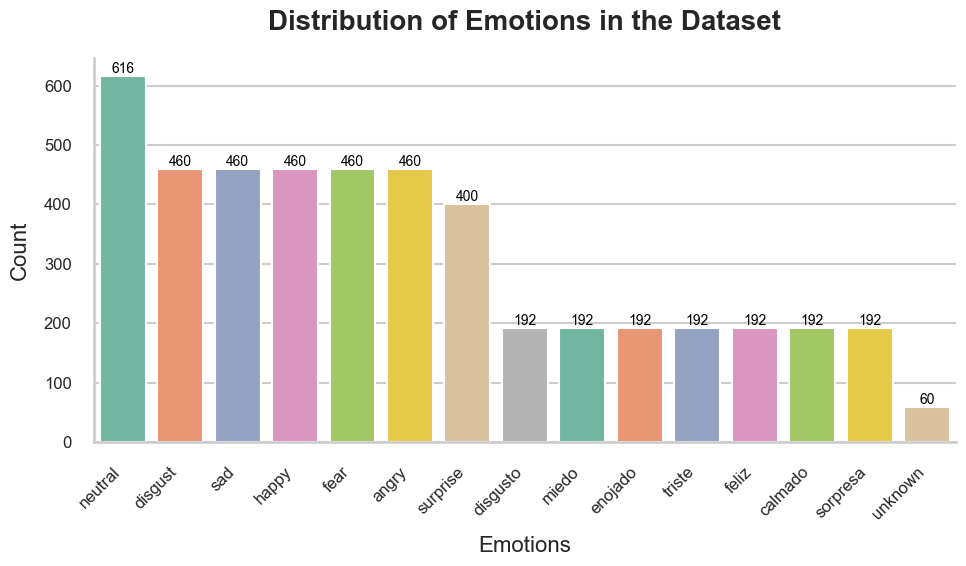

In [14]:


# Configurar estilo global
sns.set(style="whitegrid", context="talk")  # 'context="talk"' aumenta tamaños para presentaciones

# Crear la figura
plt.figure(figsize=(10, 6))  # Tamaño ajustado para mayor claridad

# Gráfico de barras con mejoras
ax = sns.countplot(
    x='Emotions',
    data=data_path,
    palette='Set2',        # Paleta colorida y distintiva
    order=data_path['Emotions'].value_counts().index  # Ordenar por frecuencia
)

# Personalizar título y etiquetas
plt.title('Distribution of Emotions in the Dataset', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Emotions', fontsize=16, labelpad=10)
plt.ylabel('Count', fontsize=16, labelpad=10)

# Rotar etiquetas y ajustar fuente
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de conteo sobre las barras
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Ajustar diseño
sns.despine(top=True, right=True)
plt.tight_layout()

# Guardar el gráfico (opcional)
plt.savefig('emotion_distribution.png', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

In [15]:
def create_waveplot(data, sr, emotion):
    """Genera una gráfica de forma de onda para un archivo de audio."""
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {emotion} emotion', fontsize=15)
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.xlim(0, len(data) / sr)  # Asegura que el eje x corresponda al tiempo real
    plt.show()

def create_spectrogram(data, sr, emotion):
    """Genera un espectrograma para un archivo de audio."""
    X = librosa.stft(data)  # Transformada de Fourier de corto plazo
    Xdb = librosa.amplitude_to_db(abs(X))  # Convertir a escala logarítmica
    
    plt.figure(figsize=(10, 3))
    plt.title(f'Spectrogram for audio with {emotion} emotion', fontsize=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')  # Logarítmico para mejor análisis
    plt.colorbar(label='dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


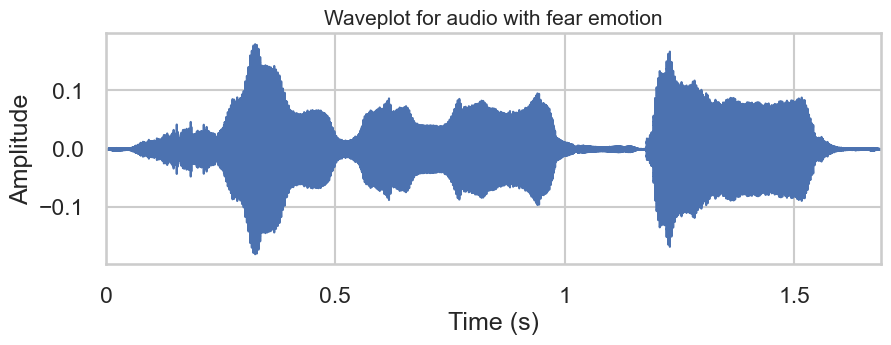

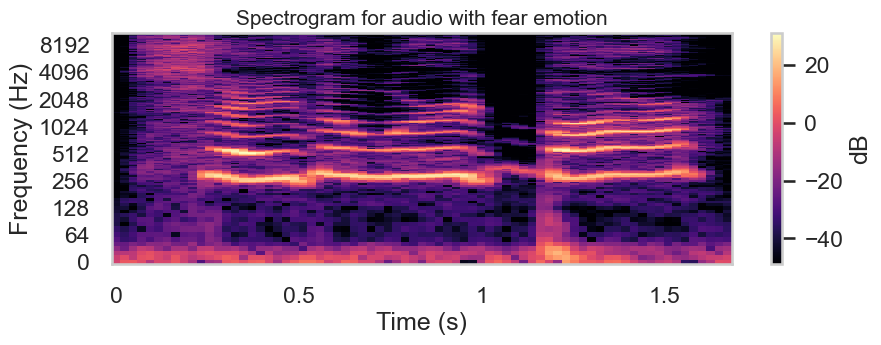

In [16]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

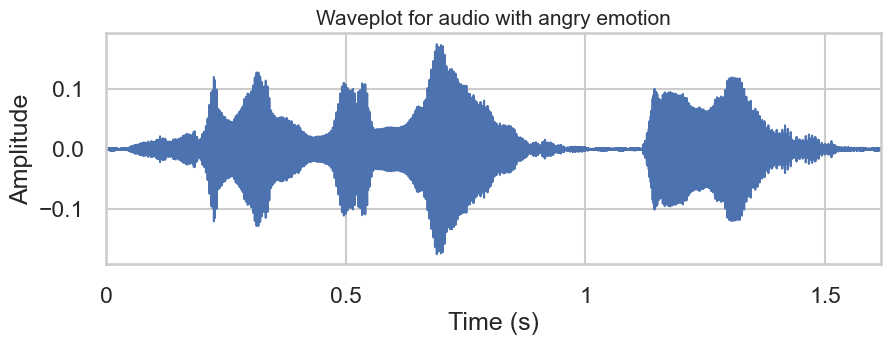

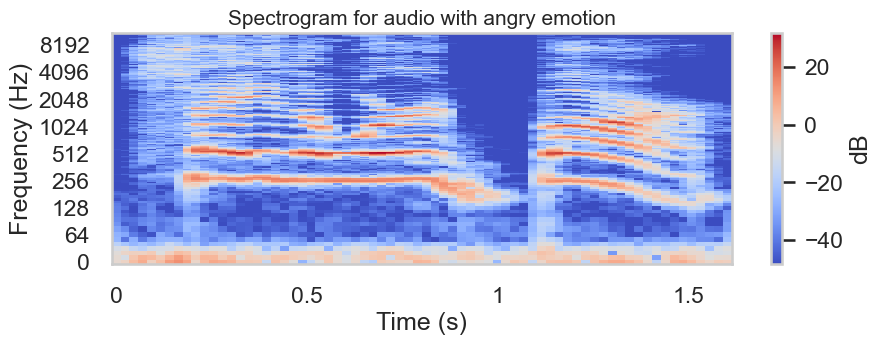

In [17]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

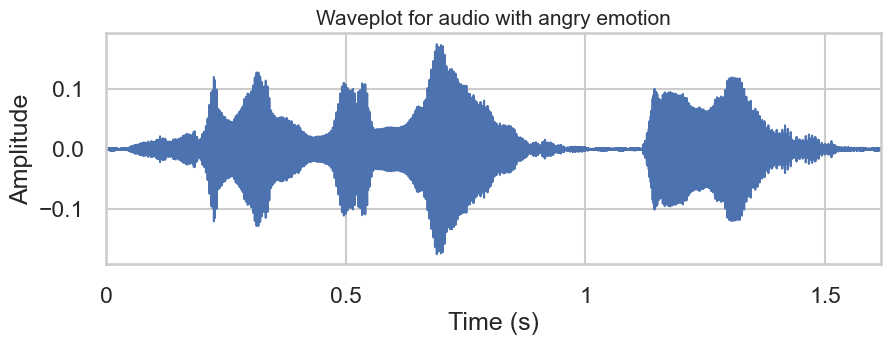

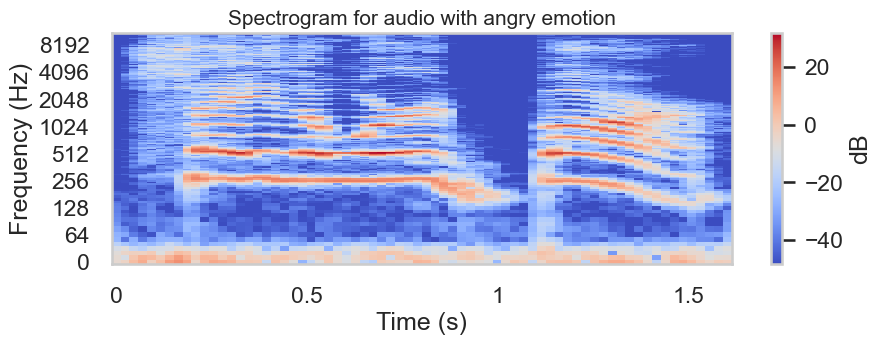

In [18]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

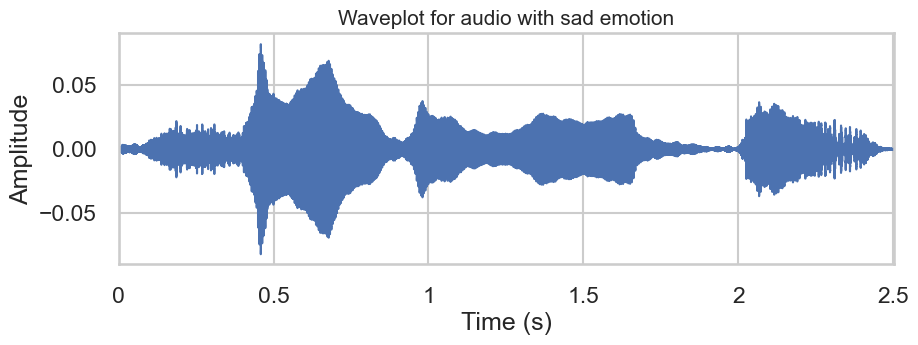

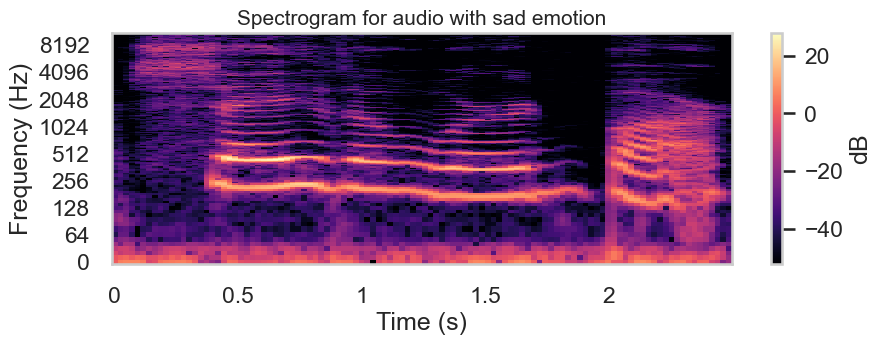

In [19]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

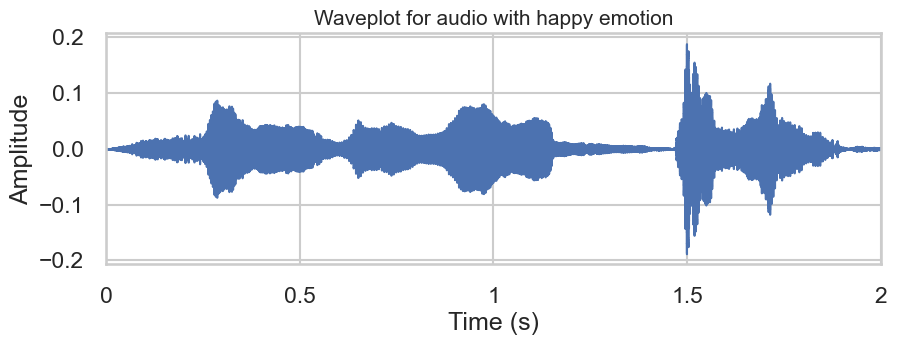

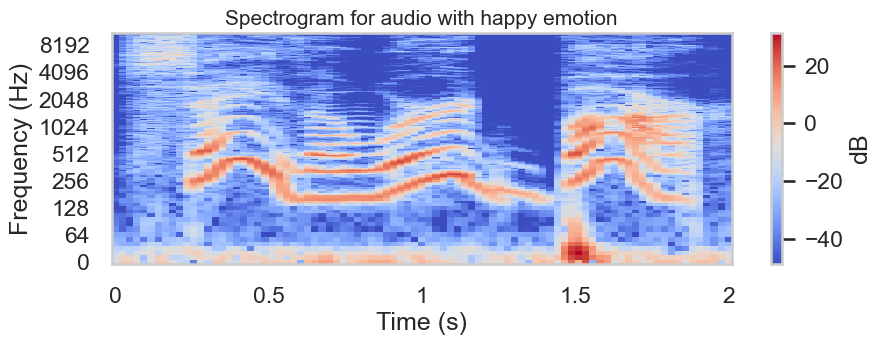

In [20]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [22]:
# Función para agregar ruido
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)  # Amplificación del ruido
    data = data + noise_amp * np.random.normal(size=data.shape[0])  # Agregar ruido gaussiano
    return data

# Función para estirar el tiempo del audio
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

# Función para desplazar el audio
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)  # Desplazamiento aleatorio
    return np.roll(data, shift_range)

# Función para cambiar el pitch del audio
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)

# Cargar un archivo de audio de ejemplo
path = np.array(data_path.Path)[1]  # Asegúrate de que 'data_path.Path' contenga la ruta correcta
data, sample_rate = librosa.load(path)

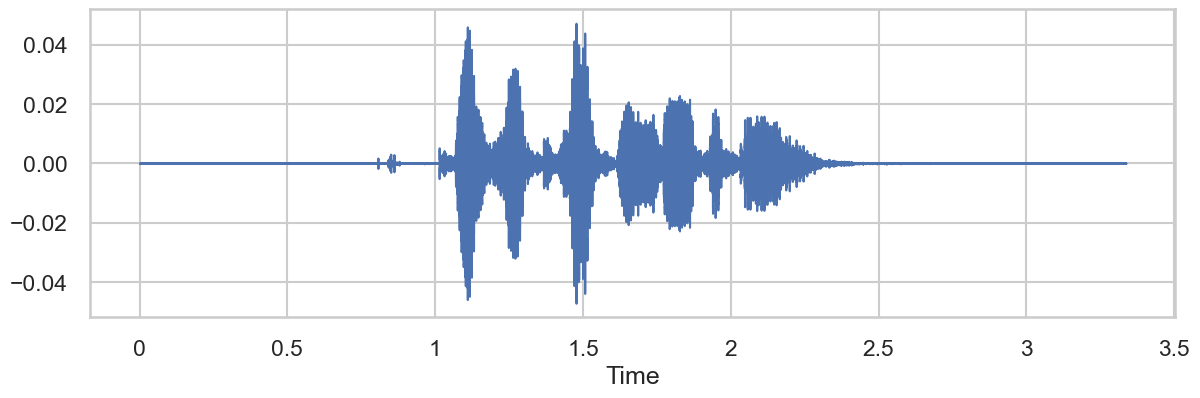

In [23]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(data, sr=sample_rate)  # Actualizado a waveshow
plt.show()
Audio(path)

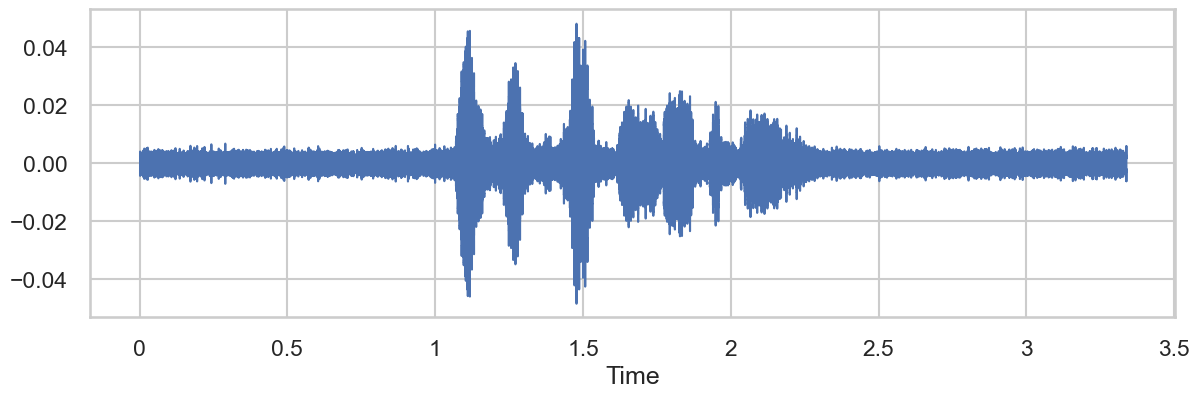

In [24]:
x = noise(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(x, sr=sample_rate)  # Actualizado a waveshow
plt.show()
Audio(x, rate=sample_rate)

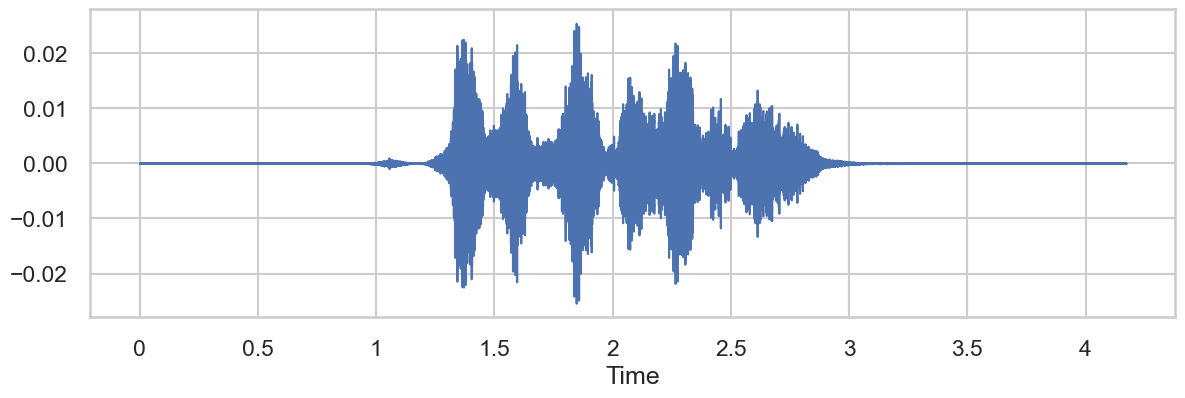

In [25]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(x, sr=sample_rate)
Audio(x, rate=sample_rate)

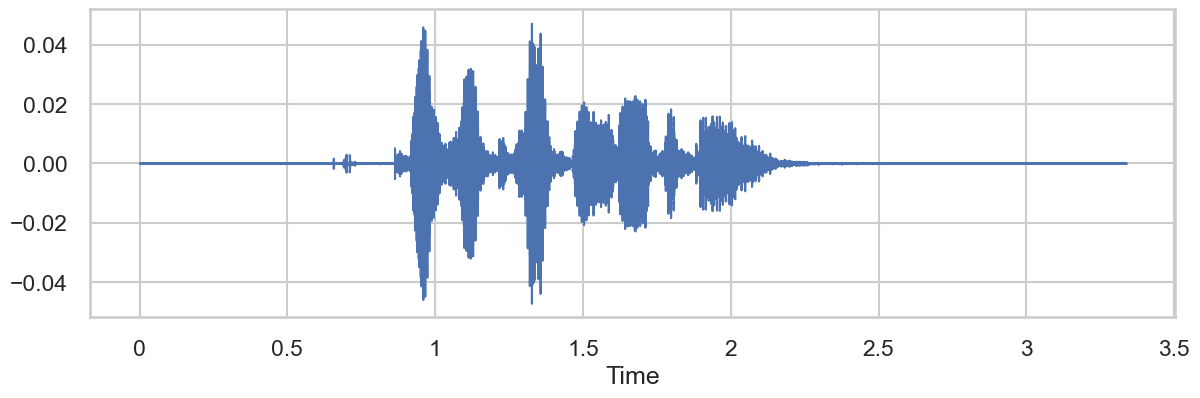

In [26]:
x = shift(data)  # Aplica el desplazamiento a los datos de audio

# Visualiza el audio desplazado
plt.figure(figsize=(14, 4))
librosa.display.waveshow(x, sr=sample_rate)  # Usar 'waveshow' en lugar de 'waveplot'
plt.show()

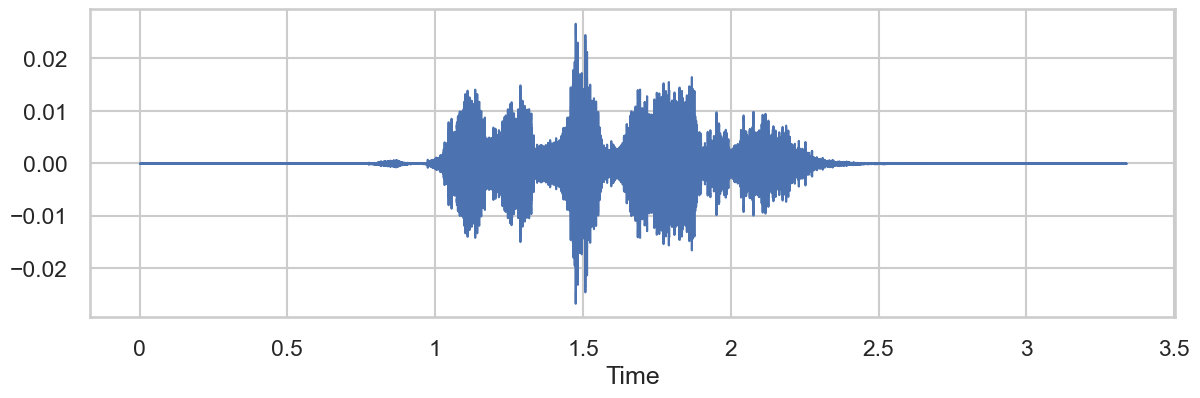

In [20]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [27]:
def extract_features(data):
    """
    Extrae características acústicas de un archivo de audio usando librosa.
    Se incluyen: tasa de cruce por cero (ZCR), cromatograma, MFCC, RMS y MelSpectrogram.
    """

    result = np.array([])  # Inicializa un array vacío para almacenar las características

    # 1. Tasa de cruce por cero (Zero Crossing Rate - ZCR)
    # Representa la cantidad de veces que la señal cruza el eje cero, útil para detectar transiciones rápidas en el audio.
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # Agrega la característica al array

    # 2. Chroma STFT
    # Representa la intensidad de cada tono en una escala cromática.
    stft = np.abs(librosa.stft(data))  # Obtiene la Transformada de Fourier de corto plazo
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # 3. MFCC (Coeficientes Cepstrales en Frecuencia Mel)
    # Representa el espectro de la señal en la escala Mel, útil para reconocimiento de voz y emociones.
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # 4. RMS (Root Mean Square)
    # Mide la energía de la señal, indicando la intensidad del sonido.
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))

    # 5. Mel Spectrogram
    # Representa la energía en diferentes bandas de frecuencia según la escala Mel.
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))

    return result  # Devuelve el array con todas las características extraídas

def get_features(path):
    """
    Carga un archivo de audio y extrae sus características sin modificaciones,
    con ruido añadido y con estiramiento y cambio de tono.
    """

    # Carga el archivo de audio con una duración de 2.5 segundos y un desplazamiento inicial de 0.6s
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # 1. Características del audio original
    res1 = extract_features(data)
    result = np.array(res1)

    # 2. Características del audio con ruido añadido
    noise_data = noise(data)  # Agrega ruido al audio
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # Apila verticalmente los resultados

    # 3. Características del audio con estiramiento y cambio de tono
    new_data = stretch(data)  # Aplica estiramiento de tiempo
    data_stretch_pitch = pitch(new_data, sample_rate)  # Modifica el tono del audio
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))

    return result  # Devuelve una matriz con todas las características extraídas


In [28]:
# Inicializamos las listas donde almacenaremos las características (X) y las emociones (Y)
X, Y = [], []

def process_file(path, emotion):
    """
    Procesa un archivo de audio para extraer sus características.
    Retorna una lista de tuplas donde cada elemento contiene las características extraídas
    junto con la emoción correspondiente.
    """
    feature = get_features(path)  # Extrae las características del audio
    return [(ele, emotion) for ele in feature]  # Asocia cada conjunto de características con la emoción

# Usamos concurrencia para procesar múltiples archivos en paralelo y acelerar el análisis
with concurrent.futures.ThreadPoolExecutor(max_workers=100) as executor:
    # Creamos una lista de tareas a ejecutar en paralelo
    futures = [executor.submit(process_file, p, e) for p, e in zip(data_path.Path, data_path.Emotions)]

    # Procesamos los resultados a medida que las tareas se completan
    for future in concurrent.futures.as_completed(futures):
        try:
            file_result = future.result()  # Obtenemos el resultado del archivo procesado
            # Extendemos X con las características y Y con las emociones
            X.extend(x for x, y in file_result)
            Y.extend(y for x, y in file_result)
        except Exception as e:
            print(f"Error en un archivo: {e}")  # Captura errores sin detener el proceso completo

print("Procesamiento completado.")  # Mensaje de confirmación al finalizar



Procesamiento completado.


In [44]:
len(X), len(Y), data_path.Path.shape


(14160, 14160, (4720,))

In [45]:
# Crear un DataFrame a partir de las características extraídas (X)
Features = pd.DataFrame(X)

# Agregar una nueva columna al DataFrame 'Features' con las etiquetas de emociones (Y)
Features['labels'] = Y

# Guardar el DataFrame como un archivo CSV llamado 'features.csv', sin incluir el índice
Features.to_csv('features.csv', index=False)

# Mostrar las primeras filas del DataFrame 'Features' para revisar los datos
Features.head()


,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.249268,0.589103,0.577856,0.574146,0.591218,0.573440,0.559172,0.617355,0.748456,0.716944,...,0.000073,0.000106,0.000070,0.000077,0.000042,0.000054,0.000039,0.000026,1.809381e-06,feliz
1,0.312098,0.711822,0.729357,0.735410,0.758451,0.736612,0.682460,0.733999,0.752171,0.686753,...,0.000750,0.000796,0.000750,0.000712,0.000697,0.000771,0.000747,0.000709,7.026891e-04,feliz
2,0.188451,0.581551,0.563022,0.554698,0.549249,0.558822,0.546697,0.594061,0.714175,0.783558,...,0.000038,0.000018,0.000021,0.000021,0.000016,0.000011,0.000010,0.000006,3.965706e-07,feliz
3,0.198419,0.723169,0.724002,0.584968,0.594664,0.560543,0.510309,0.530816,0.561072,0.591612,...,0.000013,0.000026,0.000014,0.000009,0.000007,0.000004,0.000003,0.000003,4.685804e-07,triste
4,0.253450,0.714851,0.793513,0.705906,0.685409,0.684989,0.615891,0.551876,0.580383,0.598450,...,0.000021,0.000034,0.000021,0.000016,0.000015,0.000012,0.000011,0.000010,8.210015e-06,triste


In [46]:
# Extraer todas las columnas excepto la última (que es 'labels') para obtener las características
X = Features.iloc[:, :-1].values

# Extraer solo la columna 'labels' para obtener las etiquetas (emociones)
Y = Features['labels'].values


In [47]:
# Dado que es un problema de clasificación multicategoría, realizamos OneHotEncoding de las etiquetas (Y)
encoder = OneHotEncoder()

# Ajustamos el codificador a las etiquetas (Y) y las transformamos en un formato de One-Hot Encoding
Y = encoder.fit_transform(np.array(Y).reshape(-1, 1)).toarray()


In [48]:
# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)

# Mostrar las dimensiones de los conjuntos de datos resultantes
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((10620, 162), (10620, 15), (3540, 162), (3540, 15))

In [49]:
# Crear una instancia del escalador estándar
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
x_train = scaler.fit_transform(x_train)

# Transformar los datos de prueba con los parámetros ajustados en el entrenamiento
x_test = scaler.transform(x_test)

# Mostrar las formas de los conjuntos de datos después de la normalización
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((10620, 162), (10620, 15), (3540, 162), (3540, 15))

In [50]:
# Hacemos que nuestros datos sean compatibles con el modelo (agregamos una dimensión adicional)
x_train = np.expand_dims(x_train, axis=2)  # Expande las dimensiones de x_train para agregar una nueva dimensión
x_test = np.expand_dims(x_test, axis=2)    # Expande las dimensiones de x_test para agregar una nueva dimensión

# Mostrar las formas de los datos después de agregar la nueva dimensión
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((10620, 162, 1), (10620, 15), (3540, 162, 1), (3540, 15))

## **Modelado**

In [51]:


# Definir el modelo secuencial
model = Sequential()

# Capas convolucionales
model.add(Conv1D(filters=256, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
# Primera capa convolucional con 256 filtros, tamaño de kernel de 5 y activación 'relu'

model.add(MaxPooling1D(pool_size=2))
# Capa de MaxPooling para reducir las dimensiones espaciales de la entrada

model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
# Segunda capa convolucional, mantiene la cantidad de filtros

model.add(MaxPooling1D(pool_size=2))
# Capa de MaxPooling para la segunda capa convolucional

model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
# Tercera capa convolucional con 128 filtros

model.add(MaxPooling1D(pool_size=2))
# Capa de MaxPooling para la tercera capa convolucional

model.add(Dropout(0.5))
# Capa de Dropout para evitar el sobreajuste, eliminando el 50% de las conexiones aleatoriamente

model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
# Cuarta capa convolucional con 64 filtros

model.add(MaxPooling1D(pool_size=2))
# Capa de MaxPooling para la cuarta capa convolucional

# Capa de aplanamiento (Flatten)
model.add(Flatten())
# Aplana la salida de las capas convolucionales para que pueda ser conectada a capas densas

# Capas densas
model.add(Dense(32, activation='relu'))
# Capa densa con 32 unidades y activación 'relu'

model.add(Dropout(0.5))
# Capa de Dropout adicional para evitar el sobreajuste

model.add(Dense(15, activation='softmax'))
# Capa de salida con 15 unidades (para 15 clases) y activación 'softmax' para clasificación multicategoría

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Utiliza 'categorical_crossentropy' como función de pérdida, 'adam' como optimizador, y 'accuracy' como métrica

# Verificar la arquitectura del modelo
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)               │ (None, 158, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 79, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 75, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 37, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 33, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 12, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        12,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 547,279 (2.09 MB)

 Trainable params: 547,279 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# ReduceLROnPlateau
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, verbose=1, min_lr=1e-7)
# Reduce la tasa de aprendizaje si la validación no mejora (val_loss). 
# 'factor=0.4' reduce la tasa de aprendizaje en un 40%, 'patience=3' significa esperar 3 épocas sin mejora,
# 'min_lr=1e-7' es el valor mínimo de la tasa de aprendizaje y 'verbose=1' muestra mensajes en la consola.

# ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
# Guarda el mejor modelo (según 'val_loss') durante el entrenamiento. 
# 'save_best_only=True' asegura que solo se guarda el modelo con el mejor rendimiento de validación.

# EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
# Detiene el entrenamiento si no hay mejora en la 'val_loss' después de 10 épocas ('patience=10').
# 'restore_best_weights=True' asegura que, si el entrenamiento se detiene, se restauren los mejores pesos del modelo.

# Entrenamiento
history = model.fit(
    x_train, y_train,  # Entrenamiento con los datos de entrada y las etiquetas
    batch_size=64,  # Número de muestras por actualización de pesos
    epochs=85,  # Número de épocas para entrenar
    validation_data=(x_test, y_test),  # Datos de validación para evaluar el modelo durante el entrenamiento
    callbacks=[rlrp, checkpoint, early_stopping]  # Llamadas para aplicar las técnicas de regularización y guarda el modelo
)


Epoch 1/85
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1679 - loss: 2.5271
Epoch 1: val_loss improved from inf to 1.72403, saving model to best_model.keras
166/166 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.1682 - loss: 2.5261 - val_accuracy: 0.4912 - val_loss: 1.7240 - learning_rate: 0.0010
Epoch 2/85
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4182 - loss: 1.8207
Epoch 2: val_loss improved from 1.72403 to 1.17530, saving model to best_model.keras
166/166 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.4184 - loss: 1.8199 - val_accuracy: 0.6398 - val_loss: 1.1753 - learning_rate: 0.0010
Epoch 3/85
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5342 - loss: 1.3995
Epoch 3: val_loss improved from 1.17530 to 0.93023, saving model to best_model.keras
166/166 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.5343 - loss: 1.3993 - val_accuracy: 0.6989 - val_loss: 0.9302 - learning_rate: 0.0010
Epoch 4/85
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accu

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8602 - loss: 0.3926
Accuracy of our model on test data :  85.84745526313782 %


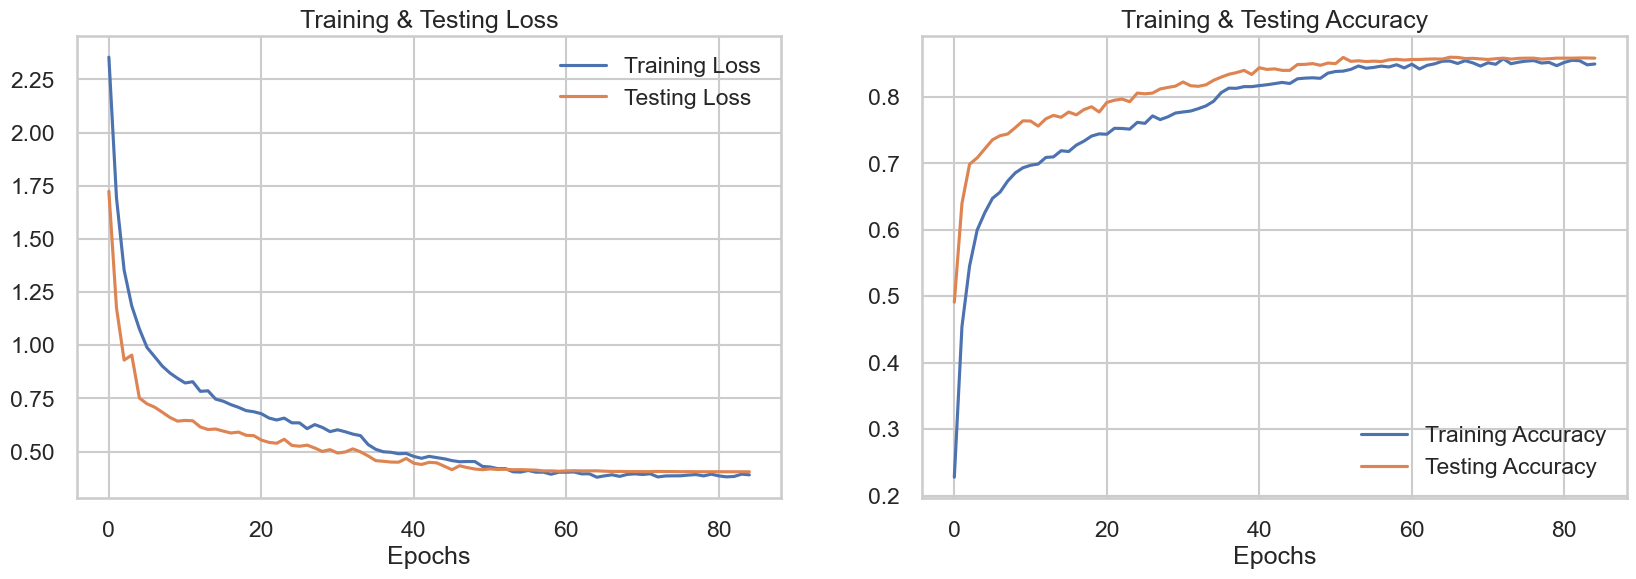

In [53]:
# Evaluar el modelo en los datos de prueba y mostrar la precisión
print("Accuracy of our model on test data : ", model.evaluate(x_test, y_test)[1] * 100, "%")
# El método 'evaluate' calcula la pérdida y la precisión en los datos de prueba. 
# Usamos [1] para obtener la precisión, y la multiplicamos por 100 para mostrarla como porcentaje.

# Ajustar los epochs al número real de épocas en 'history'
epochs = [i for i in range(len(history.history['accuracy']))]  # Esto usa la longitud real del historial de precisión
# Se crea una lista de índices que representa las épocas que se han completado durante el entrenamiento.

# Crear la figura y los ejes para los gráficos
fig, ax = plt.subplots(1, 2)  # Se crea un solo conjunto de subgráficos (1 fila, 2 columnas)

# Extraer los valores de precisión y pérdida para el entrenamiento y la validación
train_acc = history.history['accuracy']  # Precisión en entrenamiento
train_loss = history.history['loss']  # Pérdida en entrenamiento
test_acc = history.history['val_accuracy']  # Precisión en validación
test_loss = history.history['val_loss']  # Pérdida en validación

# Ajustar el tamaño de la figura
fig.set_size_inches(20, 6)

# Graficar la pérdida de entrenamiento y prueba
ax[0].plot(epochs, train_loss, label='Training Loss')  # Pérdida en el entrenamiento
ax[0].plot(epochs, test_loss, label='Testing Loss')  # Pérdida en la validación
ax[0].set_title('Training & Testing Loss')  # Título del gráfico
ax[0].legend()  # Mostrar la leyenda
ax[0].set_xlabel("Epochs")  # Etiqueta del eje x

# Graficar la precisión de entrenamiento y prueba
ax[1].plot(epochs, train_acc, label='Training Accuracy')  # Precisión en el entrenamiento
ax[1].plot(epochs, test_acc, label='Testing Accuracy')  # Precisión en la validación
ax[1].set_title('Training & Testing Accuracy')  # Título del gráfico
ax[1].legend()  # Mostrar la leyenda
ax[1].set_xlabel("Epochs")  # Etiqueta del eje x

# Mostrar el gráfico
plt.show()


In [54]:
# Realizar predicciones sobre los datos de prueba
pred_test = model.predict(x_test)  # Predicción del modelo sobre los datos de prueba
# 'model.predict()' genera una matriz de probabilidades para cada clase en cada muestra.

# Convertir las predicciones a las etiquetas originales
y_pred = encoder.inverse_transform(pred_test)  # Convertir las predicciones codificadas en un array de etiquetas originales

# Convertir las etiquetas reales a su forma original
y_test = encoder.inverse_transform(y_test)  # Convertir las etiquetas reales codificadas a su forma original


111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [55]:
# Crear un DataFrame para comparar las etiquetas predichas con las reales
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])  # Inicializar un DataFrame vacío con las columnas adecuadas

# Asignar las predicciones y las etiquetas reales al DataFrame
df['Predicted Labels'] = y_pred.flatten()  # Aplanar las predicciones y asignarlas a la columna 'Predicted Labels'
df['Actual Labels'] = y_test.flatten()    # Aplanar las etiquetas reales y asignarlas a la columna 'Actual Labels'

# Mostrar las primeras 10 filas del DataFrame
df.head(10)  # Mostrar las primeras 10 filas para revisar las predicciones vs las etiquetas reales


,Predicted Labels,Actual Labels
0,happy,happy
1,disgust,disgust
2,calmado,neutral
3,neutral,neutral
4,miedo,feliz
5,disgust,disgust
6,fear,fear
7,neutral,neutral
8,enojado,enojado
9,fear,fear


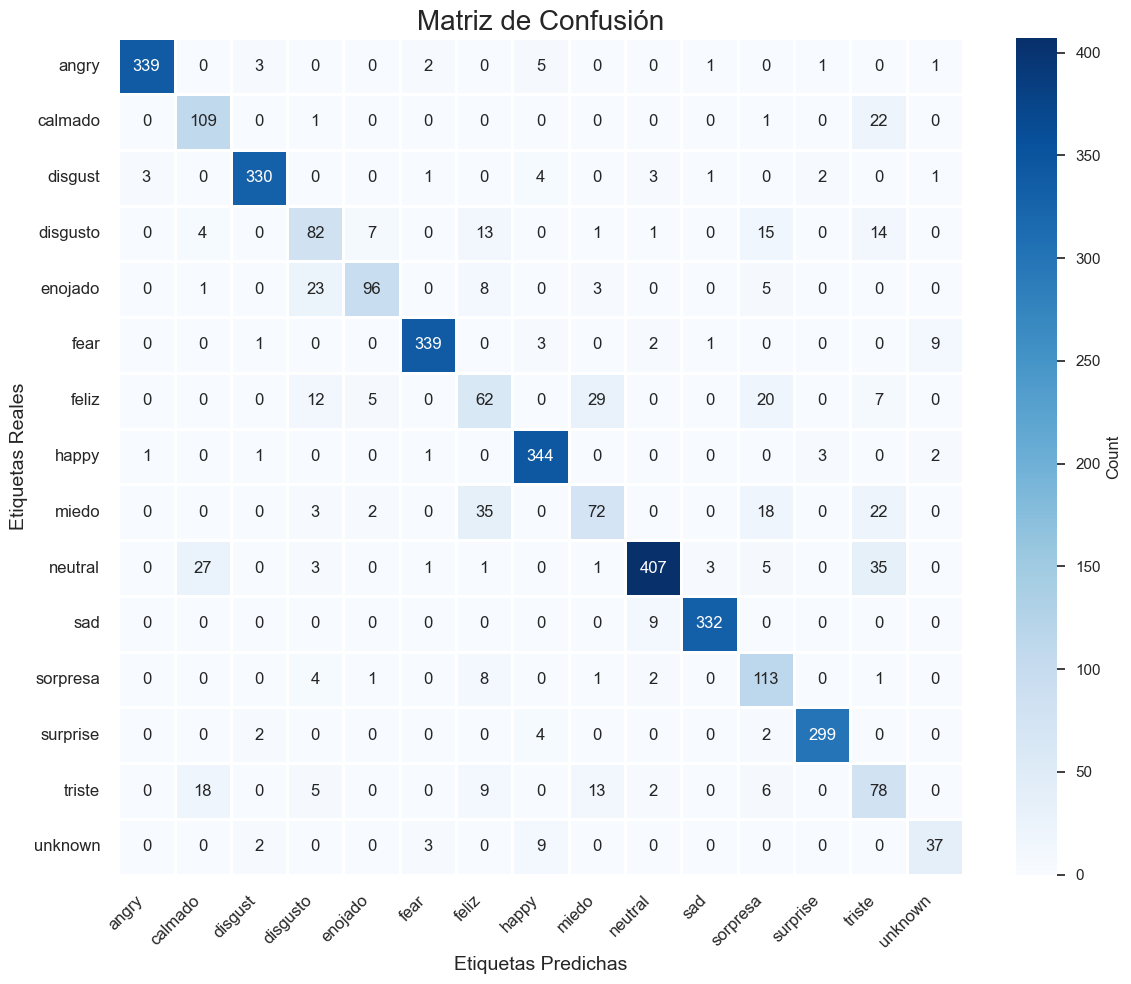

In [56]:
# Generar matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear DataFrame con la matriz de confusión
cm_df = pd.DataFrame(cm, index=[i for i in encoder.categories_[0]], columns=[i for i in encoder.categories_[0]])

# Configurar tamaño y estilo del gráfico
plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')  # Estilo de fondo

# Crear el heatmap con mejor diseño
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', linewidths=1, linecolor='white', cbar_kws={'label': 'Count'},
            annot_kws={"size": 12}, xticklabels=True, yticklabels=True)

# Títulos y etiquetas
plt.title('Matriz de Confusión', size=20)
plt.xlabel('Etiquetas Predichas', size=14)
plt.ylabel('Etiquetas Reales', size=14)

# Mejorar la visibilidad de las etiquetas
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


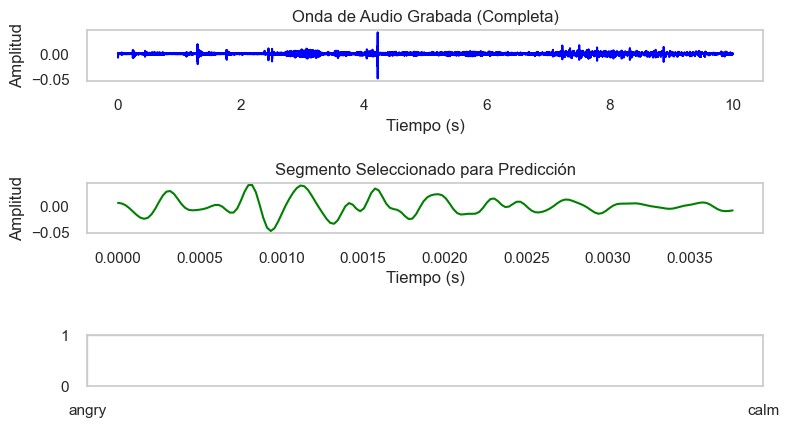

Exception in thread Thread-16 (play_audio_thread):
Traceback (most recent call last):
  File "C:\Users\cruzj\AppData\Local\Temp\ipykernel_12256\2805195934.py", line 91, in play_audio_thread
  File "c:\Users\cruzj\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1702, in configure
    return self._configure('configure', cnf, kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\cruzj\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1692, in _configure
    self.tk.call(_flatten((self._w, cmd)) + self._options(cnf))
RuntimeError: main thread is not in main loop

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\cruzj\AppData\Local\Programs\Python\Python311\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\cruzj\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_r

In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import sounddevice as sd
import librosa
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import threading
import queue

# Cargar el modelo
model = tf.keras.models.load_model('best_model.keras')

# Parámetros
sample_rate = 44100  # Frecuencia de muestreo
duration = 10  # Duración de la grabación en segundos
emotions = ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
n_time_steps = 166  # El modelo espera 166 pasos de tiempo
min_amplitude_threshold = 0.01  # Umbral mínimo de amplitud
audio_length = n_time_steps

class EmotionRecognizerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Reconocedor de Emociones en Voz")
        self.root.geometry("800x600")

        # Variables
        self.audio_clean = None
        self.audio_processed = None
        self.recording = False
        self.task_queue = queue.Queue()

        # Interfaz gráfica
        self.label = tk.Label(root, text="Presiona 'Grabar' para empezar", font=("Arial", 14))
        self.label.pack(pady=10)

        # Botones
        self.btn_record = tk.Button(root, text="Grabar", command=self.start_recording, font=("Arial", 12))
        self.btn_record.pack(pady=5)

        self.btn_play = tk.Button(root, text="Reproducir", command=self.play_audio, font=("Arial", 12), state=tk.DISABLED)
        self.btn_play.pack(pady=5)

        self.btn_predict = tk.Button(root, text="Predecir Emoción", command=self.predict_emotion, font=("Arial", 12), state=tk.DISABLED)
        self.btn_predict.pack(pady=5)

        # Área para mostrar resultados
        self.result_label = tk.Label(root, text="", font=("Arial", 12), wraplength=700)
        self.result_label.pack(pady=10)

        # Gráfica de ondas de audio
        self.fig, (self.ax1, self.ax2) = plt.subplots(2, 1, figsize=(8, 4))
        self.canvas = FigureCanvasTkAgg(self.fig, master=root)
        self.canvas.get_tk_widget().pack(pady=10)

        # Procesar tareas en la cola
        self.root.after(100, self.process_queue)

    def start_recording(self):
        if not self.recording:
            self.recording = True
            self.label.config(text="Grabando... ¡Habla ahora!")
            self.btn_record.config(state=tk.DISABLED)
            threading.Thread(target=self.record_audio, daemon=True).start()

    def record_audio(self):
        recording = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
        sd.wait()
        self.task_queue.put(("recording_finished", recording))

    def play_audio(self):
        if self.audio_clean is not None:
            threading.Thread(target=self.play_audio_thread, daemon=True).start()

    def play_audio_thread(self):
        sd.play(self.audio_clean, samplerate=sample_rate)
        sd.wait()
        self.task_queue.put(("play_finished", None))

    def predict_emotion(self):
        if self.audio_processed is not None:
            threading.Thread(target=self.predict_emotion_thread, daemon=True).start()

    def predict_emotion_thread(self):
        # Asegurar la forma correcta: (1, 166, 1)
        audio_processed = np.expand_dims(self.audio_processed, axis=0)  # (1, 166)
        audio_processed = np.expand_dims(audio_processed, axis=-1)  # (1, 166, 1)

        # Normalización robusta
        audio_processed = audio_processed / (np.max(np.abs(audio_processed)) + 1e-6)

        # Hacer la predicción
        predictions = model.predict(audio_processed)
        predicted_emotion = emotions[np.argmax(predictions)]
        confidence = np.max(predictions) * 100
        probs = [f"{emo}: {prob*100:.2f}%" for emo, prob in zip(emotions, predictions[0])]

        self.task_queue.put(("prediction_finished", (predicted_emotion, confidence, probs)))

    def process_queue(self):
        try:
            while True:
                task, data = self.task_queue.get_nowait()
                if task == "recording_finished":
                    self.recording = False
                    self.label.config(text="Grabación terminada")
                    self.btn_record.config(state=tk.NORMAL)

                    # Convertir a array 1D
                    audio = data.flatten()

                    # Eliminar ruido de fondo
                    self.audio_clean = librosa.effects.preemphasis(audio)

                    # Verificar si el audio tiene suficiente volumen
                    max_amplitude = np.max(np.abs(self.audio_clean))
                    if max_amplitude < min_amplitude_threshold:
                        messagebox.showwarning("Audio Silencioso", "El audio es demasiado silencioso. Intenta hablar más fuerte.")
                        self.label.config(text="Presiona 'Grabar' para empezar")
                        continue

                    # Ajustar la longitud del audio a 166 muestras
                    if len(self.audio_clean) > audio_length:
                        energy = np.abs(self.audio_clean)
                        window_size = audio_length
                        start_idx = np.argmax(np.convolve(energy, np.ones(window_size), mode='valid'))
                        self.audio_processed = self.audio_clean[start_idx:start_idx + audio_length]
                    else:
                        self.audio_processed = np.pad(self.audio_clean, (0, audio_length - len(self.audio_clean)), mode='constant')

                    # Actualizar gráficas
                    self.ax1.clear()
                    self.ax2.clear()

                    time = np.linspace(0, len(self.audio_clean) / sample_rate, num=len(self.audio_clean))
                    self.ax1.plot(time, self.audio_clean, color='blue')
                    self.ax1.set_title("Onda de Audio Grabada (Completa)")
                    self.ax1.set_xlabel("Tiempo (s)")
                    self.ax1.set_ylabel("Amplitud")
                    self.ax1.grid()

                    time_processed = np.linspace(0, len(self.audio_processed) / sample_rate, num=len(self.audio_processed))
                    self.ax2.plot(time_processed, self.audio_processed, color='green')
                    self.ax2.set_title("Segmento Seleccionado para Predicción")
                    self.ax2.set_xlabel("Tiempo (s)")
                    self.ax2.set_ylabel("Amplitud")
                    self.ax2.grid()

                    self.fig.tight_layout()
                    self.canvas.draw()

                    # Habilitar botones
                    self.btn_play.config(state=tk.NORMAL)
                    self.btn_predict.config(state=tk.NORMAL)

                elif task == "play_finished":
                    self.label.config(text="Reproducción terminada")

                elif task == "prediction_finished":
                    predicted_emotion, confidence, probs = data
                    result_text = f"La emoción predicha en tu voz es: {predicted_emotion} (confianza: {confidence:.2f}%)\n"
                    result_text += "Probabilidades por emoción:\n" + "\n".join(probs)
                    self.result_label.config(text=result_text)

        except queue.Empty:
            pass
        finally:
            self.root.after(100, self.process_queue)

if __name__ == "__main__":
    root = tk.Tk()
    app = EmotionRecognizerApp(root)
    root.mainloop()

In [ ]:
'''
import queue
import threading
import numpy as np
import sounddevice as sd
import librosa
import tensorflow as tf
import webrtcvad
import logging

# Configuración de logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Configuración global
SAMPLE_RATE = 16000  # Frecuencia optimizada para voz
CHUNK_DURATION = 3  # Segmentos de 3 segundos
N_TIME_STEPS = 166  # Pasos de tiempo esperados por el modelo
N_MFCC = 40  # Coeficientes MFCC
EMOTIONS = ['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Estadísticas precomputadas para normalización
TRAIN_MEAN = 0.0  # Reemplazar con la media real del conjunto de entrenamiento
TRAIN_STD = 1.0  # Reemplazar con la desviación estándar real del conjunto de entrenamiento

# Cargar modelo
model = tf.keras.models.load_model('best_model.keras')

# Configuración de paralelismo
audio_queue = queue.Queue(maxsize=10)  # Buffer ajustado
vad = webrtcvad.Vad(3)  # Detector de voz activa (modo agresivo)

# Historial para suavizado de predicciones
prediction_buffer = []

# Evento para detener los hilos
stop_event = threading.Event()

# Función para extraer características MFCC
def extract_features(audio, sr):
    try:
        # Verificar que el audio no esté vacío
        if np.max(np.abs(audio)) < 0.01:  # Umbral mínimo de amplitud
            logging.warning("El audio es demasiado silencioso. Ignorando segmento.")
            return None

        # Reducción de ruido y preprocesamiento
        audio_clean = librosa.effects.preemphasis(audio)
        audio_clean = np.nan_to_num(audio_clean)  # Reemplazar NaN o infinitos por 0

        # Detección de voz activa
        audio_int16 = (audio_clean * 32767).astype(np.int16)
        voice_frames = []

        # Procesar en ventanas de 30ms (requerido por VAD)
        for i in range(0, len(audio_int16), int(0.03 * sr)):
            frame = audio_int16[i:i + int(0.03 * sr)]
            if len(frame) < int(0.03 * sr):  # Verificar tamaño del marco
                continue
            if vad.is_speech(frame, sr):
                voice_frames.append(frame)

        if not voice_frames:  # Verificar que se detectó voz activa
            logging.warning("No se detectó voz activa en el segmento.")
            return None

        audio_voice = np.concatenate(voice_frames).astype(np.float32) / 32767

        # Extraer MFCCs
        mfccs = librosa.feature.mfcc(y=audio_voice, sr=sr, n_mfcc=N_MFCC, n_fft=2048, hop_length=512).T

        # Normalización con estadísticas precomputadas
        mfccs = (mfccs - TRAIN_MEAN) / (TRAIN_STD + 1e-6)

        return mfccs
    except Exception as e:
        logging.error(f"Error al extraer características: {e}")
        return None

# Hilo de grabación
def audio_recorder():
    logging.info("Iniciando grabación... Presiona Ctrl+C para detener.")
    try:
        with sd.InputStream(samplerate=SAMPLE_RATE, channels=1, dtype='float32',
                            blocksize=int(SAMPLE_RATE * CHUNK_DURATION)) as stream:
            while not stop_event.is_set():
                audio_chunk, _ = stream.read(int(SAMPLE_RATE * CHUNK_DURATION))
                try:
                    audio_queue.put(audio_chunk.flatten(), timeout=1)
                except queue.Full:
                    logging.warning("La cola de audio está llena. Se descartó un segmento.")
    except KeyboardInterrupt:
        logging.info("Grabación detenida.")
    except Exception as e:
        logging.error(f"Error en el hilo de grabación: {e}")

# Hilo de procesamiento
def audio_processor():
    while not stop_event.is_set():
        try:
            audio = audio_queue.get(timeout=1)

            # Extraer características
            features = extract_features(audio, SAMPLE_RATE)

            if features is None:
                continue  # Ignorar segmentos sin voz

            # Ajustar dimensión temporal
            if features.shape[0] > N_TIME_STEPS:
                features = features[:N_TIME_STEPS]
            else:
                features = np.pad(features, ((0, N_TIME_STEPS - features.shape[0]), (0, 0)), mode='constant')

            # Preparar entrada del modelo
            input_tensor = np.expand_dims(features, axis=(0, -1))

            # Predicción
            predictions = model.predict(input_tensor, verbose=0)[0]

            # Suavizado temporal
            prediction_buffer.append(predictions)
            if len(prediction_buffer) > 5:
                prediction_buffer.pop(0)

            smoothed = np.mean(prediction_buffer, axis=0)
            emotion_idx = np.argmax(smoothed)
            confidence = smoothed[emotion_idx] * 100

            # Mostrar resultados
            logging.info(f"Emoción: {EMOTIONS[emotion_idx].upper()} ({confidence:.1f}% confianza)")
            for emo, prob in zip(EMOTIONS, smoothed):
                logging.info(f"- {emo}: {prob*100:.1f}%")
        except queue.Empty:
            continue
        except Exception as e:
            logging.error(f"Error en procesamiento: {e}")

# Configuración e inicio de hilos
if __name__ == "__main__":
    recorder_thread = threading.Thread(target=audio_recorder, daemon=True)
    processor_thread = threading.Thread(target=audio_processor, daemon=True)

    recorder_thread.start()
    processor_thread.start()

    try:
        while not stop_event.is_set():
            input("Presiona Enter para salir...\n")
            stop_event.set()
    except KeyboardInterrupt:
        logging.info("Saliendo...")
        stop_event.set()

    recorder_thread.join()
    processor_thread.join()
    '''

2025-04-21 19:54:39,392 - INFO - Iniciando grabación... Presiona Ctrl+C para detener.
2025-04-21 19:54:42,426 - ERROR - Error al extraer características: Error while processing frame
2025-04-21 19:54:45,423 - ERROR - Error al extraer características: Error while processing frame
2025-04-21 19:54:48,430 - ERROR - Error al extraer características: Error while processing frame
